In [14]:
import  pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [15]:
TM = pd.read_csv('TM_MDM_VHCLE_CMG (세종 차량연계 정보).csv')
VW_in = pd.read_csv('VW_InCarinfo (차량 입차 정보 조회).csv')
VW_in = VW_in.dropna()
VW_out = pd.read_csv('VW_OutCarinfo (차량 출차 정보 조회).csv')
car_normal = pd.read_csv('일반차량.csv')
car_ticket =pd.read_csv('정기권차량.csv')

print(len(VW_in))
print(len(VW_out))

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_84321/1442274953.py:2: DtypeWarning: Columns (0,1,2,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  VW_in = pd.read_csv('VW_InCarinfo (차량 입차 정보 조회).csv')


38672
38672


In [16]:
TM.head()

,cgpn_hr_no,gvrn_gbd_code,engn_code,engn_nm,dept_code,dept_nm,clsf_nm,vhcle_entrc_mnt,cgpn_nm,psitn_entrps,...,process_yn_mdmsj091011,process_yn_mdmsjnew4,process_yn_mdmsjnew5,process_yn_mdmsjnew6,process_yn_mdmsjnew7,process_yn_mdmsjnew8,process_yn_mdmsj1213,process_yn_mdmsj1415,process_yn_mdmsjsc,process_yn_mdmsjnc
0,60031044,5,1450000,산업통상자원부,1450010,운영지원과,공업주사,1,심재욱,NaN,...,Y,Y,Y,Y,Y,N,N,N,N,N
1,60002549,5,1342000,교육부,1342010,운영지원과,기타,1,서울시교육청(부교육감),서울특별시교육청 부교육감실,...,Y,Y,Y,Y,Y,N,N,N,N,N
2,60034005,5,1342000,교육부,1342010,운영지원과,기타,1,강원도교육청 교육감,교육부,...,Y,N,Y,Y,Y,N,N,N,N,N
3,60034439,5,1543000,농림축산식품부,1543008,운영지원과,부이사관,1,박정훈,NaN,...,Y,Y,Y,Y,Y,N,N,N,N,N
4,60037103,5,1480000,환경부,1480929,자연생태정책과,파견직,1,문상균,국립생태원,...,Y,Y,Y,Y,Y,N,N,N,N,N


In [17]:
VW_in.head()

,입차일자,입차시각,차량번호,주차일련번호,입차카드번호,장비명,입차구분,입차고객구분,출차여부,차량종류
0,2022-09-01,03:20:21,88러1387,1.111422e+16,1.000000e+14,13-3동입구,정상,정기권,출차,소형
1,2022-09-01,03:56:45,경기83자4574,1.111222e+16,1.000000e+14,13-1동입구,중복,정기권,강제출차,소형
2,2022-09-01,05:14:02,56누9347,1.111322e+16,1.000000e+14,13-2동입구,정상,정기권,출차,소형
3,2022-09-01,05:05:30,94고6836,1.111422e+16,1.000000e+14,13-3동입구,정상,정기권,출차,소형
4,2022-09-01,04:57:53,74무8700,1.411122e+16,1.000000e+14,14-2동지하입구,중복,정기권,출차,소형


In [18]:
VW_out.head()

,출차일자,출차시각,차량번호,주차일련번호,출차카드번호,장비명,출차구분,출차고객구분,출차여부,차량종류
0,2022-09-01,05:32:24,94고6836,1.111422e+16,1.000000e+14,13-3동출구#1,정기권출차,정기권,출차,소형
1,2022-09-01,05:52:37,94고6836,1.111422e+16,1.000000e+14,13-3동출구#1,정기권출차,정기권,출차,소형
2,2022-09-01,06:12:11,94고6836,1.111422e+16,1.000000e+14,13-3동출구#1,정기권출차,정기권,출차,소형
3,2022-09-01,06:18:27,82도4072,1.111422e+16,1.000000e+14,13-3동출구#1,정기권출차,정기권,출차,소형
4,2022-09-01,06:39:34,94고6836,1.111422e+16,1.000000e+14,13-3동출구#1,정기권출차,정기권,출차,소형


In [19]:
car_normal.head()

,CarNo,CarInOutDtime,InOutDiv,FilePath,LPRNo,insDtime,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,367다8120,2022-10-01 22:45,2,\2022\10\01\20221001224559367다8120F.jpg,2,2022-10-01 22:45,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29서8759,2022-10-01 22:03,1,\2022\10\01\2022100122034729서8759F.jpg,1,2022-10-01 22:03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31도7993,2022-10-01 21:57,2,\2022\10\01\2022100121574031도7993F.jpg,2,2022-10-01 21:57,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70수6806,2022-10-01 21:48,2,\2022\10\01\2022100121480070수6806F.jpg,2,2022-10-01 21:48,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,382라2083,2022-10-01 21:37,2,\2022\10\01\20221001213736382라2083F.jpg,2,2022-10-01 21:37,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
car_ticket.head()

,CarNo,OfficialCar,InOutDiv,FilePath,StDate,EdDate,State,subDate,insDtime,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,54가3374,1,2,\2022\10\01\2022100123051754가3374F.jpg,44748,44869,연장,44747,44835.96200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,149허3270,1,1,\2022\10\01\20221001225326149허3270F.jpg,43964,44865,연장,43964,44835.95377,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51두0680,1,2,\2022\10\01\2022100120392851두0680F.jpg,43934,44842,연장,43934,44835.86074,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20노0407,1,2,\2022\10\01\2022100119291020노0407F.jpg,43934,44865,연장,43934,44835.81192,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104허2500,1,1,\2022\10\01\20221001192516104허2500F.jpg,43934,44865,연장,43934,44835.80920,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 이름 바꾸기 13_1동 지하 1 > 13_1동

In [21]:
import re


def slicing(df,i) :
    pattern = '.*동'
    reg = re.search(pattern, df['장비명'][i])
    reg = reg.group()
    df['장비명2'][i] = reg
    return reg
VW_in['장비명2'] = 0
for i in range(len(VW_in)):
    slicing(VW_in,i)
VW_out['장비명2'] = 0
for i in range(len(VW_out)):
    slicing(VW_out,i)

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_84321/3993426172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['장비명2'][i] = reg
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_84321/3993426172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['장비명2'][i] = reg


In [22]:
VW_in['장비명2']

0        13-3동
1        13-1동
2        13-2동
3        13-3동
4        14-2동
         ...  
38667      15동
38668      15동
38669      15동
38670      15동
38671      15동
Name: 장비명2, Length: 38672, dtype: object

In [47]:
arr = ['12동','13-1동','13-2동','13-3동','14-1동','14-2동','15동']
for i in arr :
    # num = len(VW_in[VW_in['장비명2']== i]) - len(VW_out[VW_out['장비명2']== i])
    # if num == 0 :
    #     print(f'{i}의 입차대수와 출차대수가 같습니다')
    # elif num > 0:
    #     print(f'{i}의 입차대수가 출차대수보다 {num}만큼 많습니다.')
    # else :
    #     print(f'{i}의 입차대수가 출차대수보다 {num}만큼 적습니다.')
    print(f'{i}동의 입차 수' , len(VW_in[VW_in['장비명2']== i]), '출차 수',len(VW_out[VW_out['장비명2']== i]) )

12동동의 입차 수 9720 출차 수 8782
13-1동동의 입차 수 4486 출차 수 4382
13-2동동의 입차 수 4473 출차 수 3815
13-3동동의 입차 수 774 출차 수 981
14-1동동의 입차 수 876 출차 수 1140
14-2동동의 입차 수 11438 출차 수 12696
15동동의 입차 수 6149 출차 수 6382


# 기관별, 계절별, 날씨별 차량 출입기록 분석
* 날씨는 현재 불가능/ 기관 > 동별로 가기/한 업체의 정보만 파악 가능함

## 기관별 파악하기

### 입차

Text(0.5, 1.0, '동별 입차 대수')

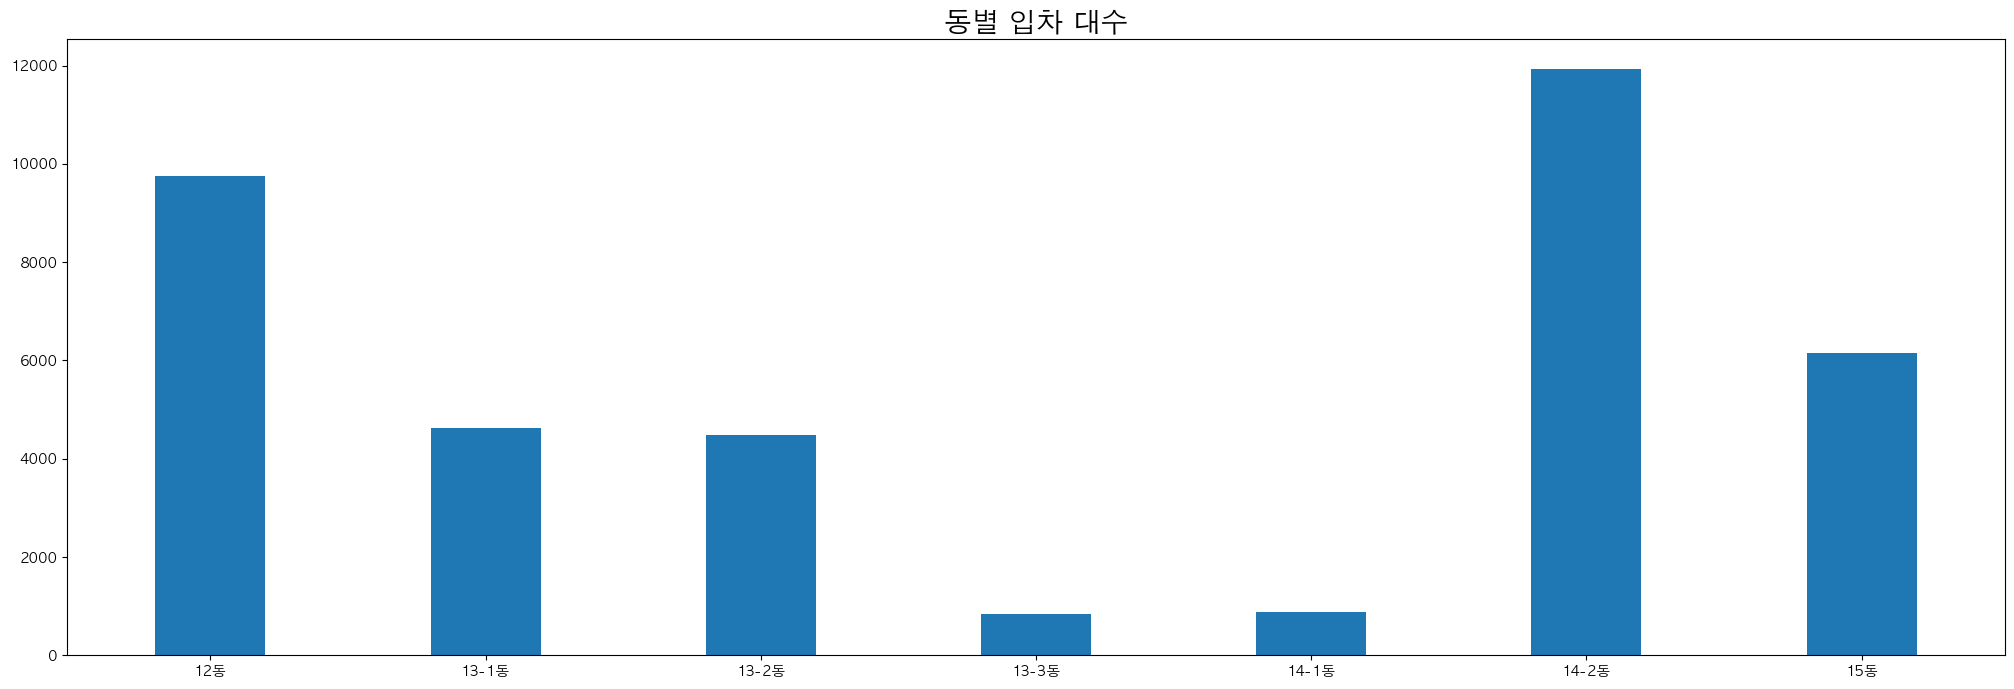

In [24]:
location = pd.DataFrame(VW_in['장비명2'].value_counts())
location.reset_index(inplace=True)
location = location.sort_values('index')

#동 입구별 차량 입차 대수
plt.figure(figsize=(25,8), facecolor='white')
plt.bar(location['index'], location['장비명2'], width=0.4)
plt.title('동별 입차 대수',fontsize=20)


### 출차

Text(0.5, 1.0, '동별 출차 대수')

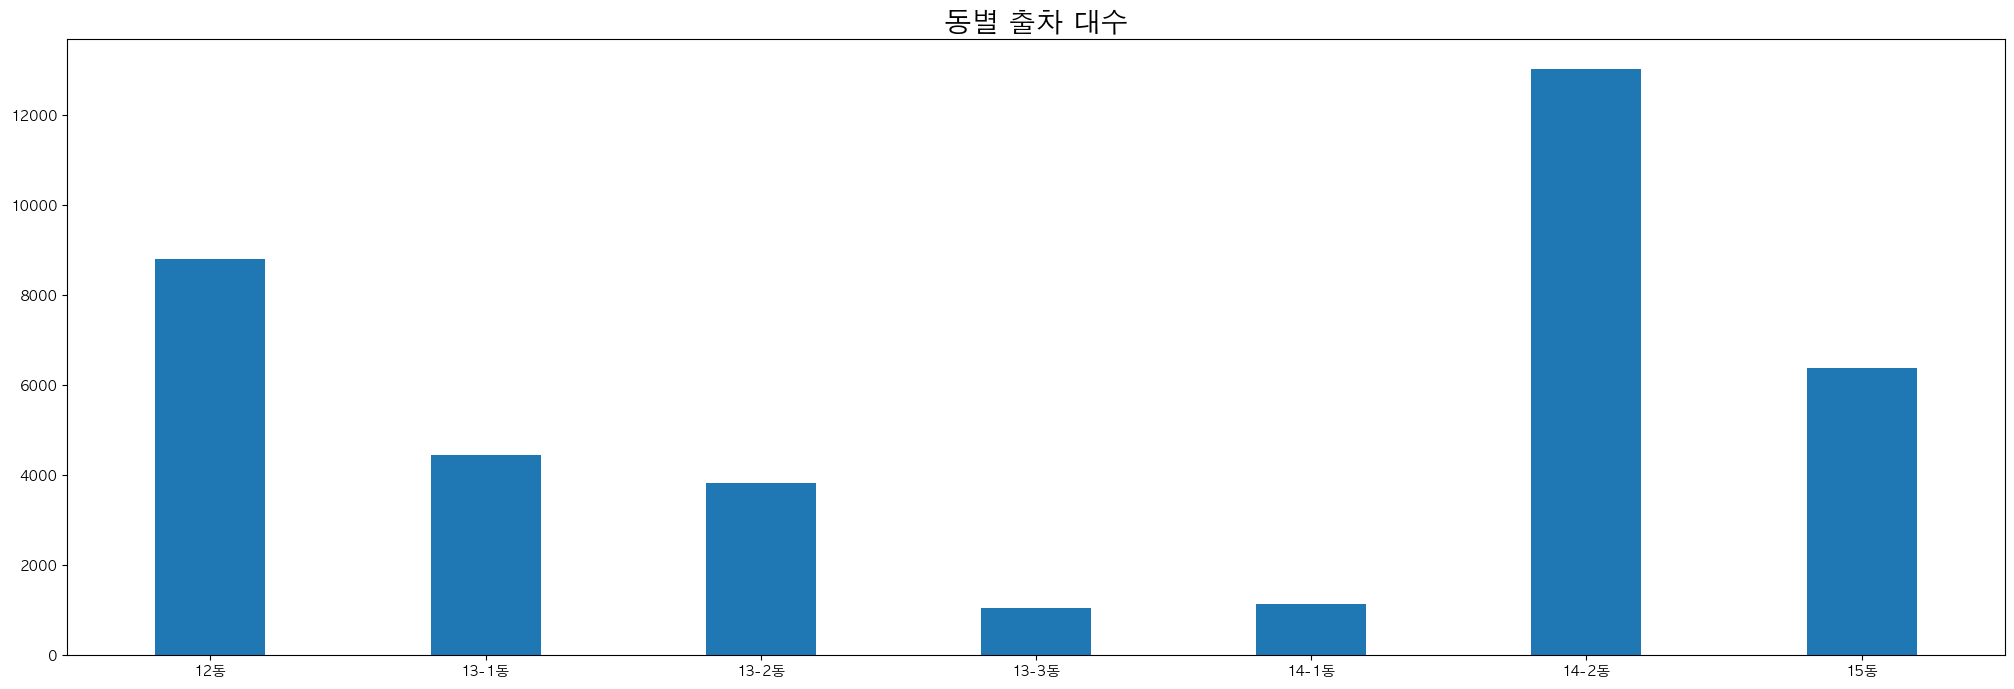

In [25]:
location = pd.DataFrame(VW_out['장비명2'].value_counts())
location.reset_index(inplace=True)
location = location.sort_values('index')

#동 입구별 차량 입차 대수
plt.figure(figsize=(25,8))
plt.bar(location['index'], location['장비명2'], width=0.4)
plt.title('동별 출차 대수',fontsize=20)

In [26]:
in_out = pd.concat([VW_in['장비명2'].value_counts(),VW_out['장비명2'].value_counts()],axis =1 )
in_out.columns=['동별입차수','동별출차수']
in_out['차이'] = in_out['동별입차수']- in_out['동별출차수']
in_out

,동별입차수,동별출차수,차이
14-2동,11940,13031,-1091
12동,9748,8798,950
15동,6157,6388,-231
13-1동,4625,4441,184
13-2동,4484,3819,665
14-1동,879,1142,-263
13-3동,839,1053,-214


## 계절별 파악하기
* 일반차량/정기권차량 >> 정기권차량의 입차,출차일자 파악불가능
* VW_in / VW_out >> 한달동안의 데이터밖에 없어서 파악불가능

In [27]:
VW_in['입차시간'] = VW_in['입차일자'] +  VW_in['입차시각']
VW_out['출차시간'] = VW_out['출차일자']  + VW_out['출차시각']


In [28]:
VW_in['입차시간'] = pd.to_datetime(VW_in['입차시간'], format='%Y-%m-%d %H:%M:%S', errors='raise')
VW_out['출차시간'] = pd.to_datetime(VW_out['출차시간'], format='%Y-%m-%d %H:%M:%S', errors='raise')

## - 주차장별, 기간별, 위치별 직원 / 방문고객 주차 차량 수 분석

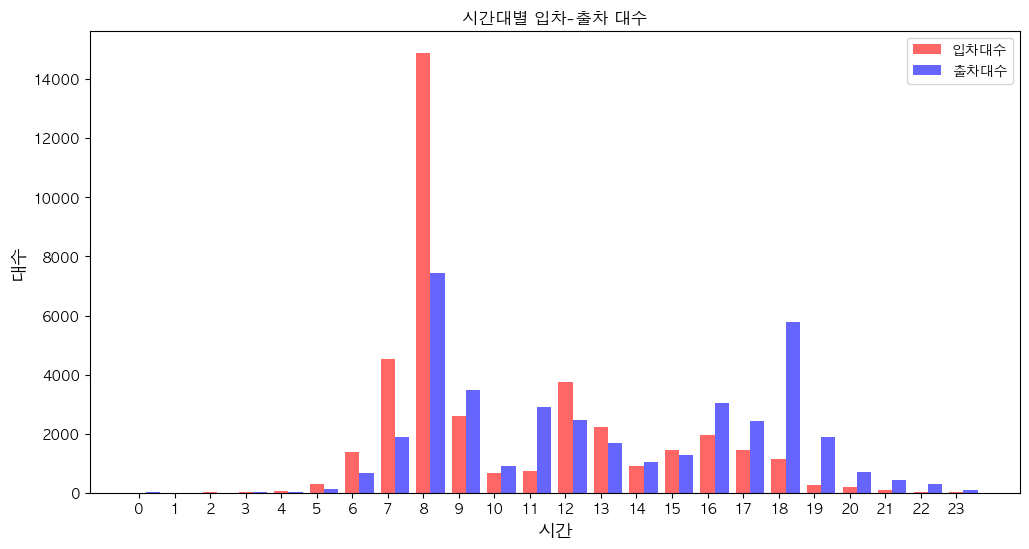

In [29]:
time = pd.concat([VW_in['입차시간'].dt.hour.value_counts(), VW_out['출차시간'].dt.hour.value_counts()], axis =1)
time.reset_index(inplace=True)
time = time.sort_values('index')
time.columns = ['시간','입차대수','출차대수']
time['입차누계'] = time['입차대수'].cumsum()
time['출차누계'] = time['출차대수'].cumsum()
time['대수'] = time['입차누계'] - time['출차누계']



# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.4

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, time['입차대수'], bar_width, alpha=0.6, color='red', label='입차대수')

b2 = plt.bar(index + bar_width, time['출차대수'], bar_width, alpha=0.6, color='blue', label='출차대수')

plt.xticks(range(24), range(24))

# x축, y축 이름 및 범례 설정
plt.xlabel('시간', size = 13)
plt.ylabel('대수', size = 13)
plt.legend()
plt.title('시간대별 입차-출차 대수')
plt.show()

In [30]:
time

,시간,입차대수,출차대수,입차누계,출차누계,대수
23,0,4,13,4,13,-9
22,1,7,5,11,18,-7
21,2,11,5,22,23,-1
18,3,28,12,50,35,15
17,4,48,26,98,61,37
13,5,282,115,380,176,204
8,6,1378,660,1758,836,922
1,7,4539,1899,6297,2735,3562
0,8,14901,7437,21198,10172,11026
3,9,2591,3495,23789,13667,10122


# 동별 시간별 차량 대수

In [31]:
VW_in['요일'] = VW_in['입차시간'].dt.day_name()
VW_out['요일'] = VW_out['출차시간'].dt.day_name()

#주말제거
VW_in = VW_in[VW_in['요일'] != 'Sunday']
VW_in = VW_in[VW_in['요일'] != 'Saturday']

VW_out = VW_out[VW_out['요일'] != 'Sunday']
VW_out = VW_out[VW_out['요일'] != 'Saturday']
#공휴일 제거
VW_in = VW_in[VW_in['입차일자'] != '2022-09-09']
VW_in = VW_in[VW_in['입차일자'] != '2022-09-12']
VW_in = VW_in[VW_in['입차일자'] != '2022-10-03']

VW_out = VW_out[VW_out['출차일자'] != '2022-09-09']
VW_out = VW_out[VW_out['출차일자'] != '2022-09-12']
VW_out = VW_out[VW_out['출차일자'] != '2022-10-03']

In [32]:
VW_in_12 = VW_in[VW_in['장비명2'] == '12동']
VW_out_12 = VW_out[VW_out['장비명2'] == '12동']
time12 = pd.concat([VW_in_12['입차시간'].dt.hour.value_counts(), VW_out_12['출차시간'].dt.hour.value_counts()], axis =1)
time12.reset_index(inplace=True)
time12= time12.sort_values('index')
time12.columns = ['시간','입차대수','출차대수']
arr = list(time12['시간'].unique())
for i in range(24):
    if i not in arr :
        time12 = time12.append({'시간': i,'입차대수': 0,'출차대수': 0},ignore_index=True)
time12 = time12.sort_values('시간')
time12['입차대수'] = time12['입차대수'].fillna(0)
time12['출차대수'] = time12['출차대수'].fillna(0)
time12['입차누계'] = time12['입차대수'].cumsum()
time12['출차누계'] = time12['출차대수'].cumsum()
time12['대수'] = time12['입차누계'] - time12['출차누계']
time12['장소'] = '12동'

VW_in_13_1 = VW_in[VW_in['장비명2'] == '13-1동']
VW_out_13_1 = VW_out[VW_out['장비명2'] == '13-1동']
time13_1 = pd.concat([VW_in_13_1['입차시간'].dt.hour.value_counts(), VW_out_13_1['출차시간'].dt.hour.value_counts()], axis =1)
time13_1.reset_index(inplace=True)
time13_1= time13_1.sort_values('index')
time13_1.columns = ['시간','입차대수','출차대수']
arr = list(time13_1['시간'].unique())
for i in range(24):
    if i not in arr :
        time13_1 = time13_1.append({'시간': i,'입차대수': 0,'출차대수': 0},ignore_index=True)
time13_1 = time13_1.sort_values('시간')
time13_1['입차대수'] = time13_1['입차대수'].fillna(0)
time13_1['출차대수'] = time13_1['출차대수'].fillna(0)
time13_1['입차누계'] = time13_1['입차대수'].cumsum()
time13_1['출차누계'] = time13_1['출차대수'].cumsum()
time13_1['대수'] = time13_1['입차누계'] - time13_1['출차누계']
time13_1['장소'] = '13-1동'

VW_in_13_2 = VW_in[VW_in['장비명2'] == '13-2동']
VW_out_13_2 = VW_out[VW_out['장비명2'] == '13-2동']
time13_2 = pd.concat([VW_in_13_2['입차시간'].dt.hour.value_counts(), VW_out_13_2['출차시간'].dt.hour.value_counts()], axis =1)
time13_2.reset_index(inplace=True)
time13_2= time13_2.sort_values('index')
time13_2.columns = ['시간','입차대수','출차대수']
arr = list(time13_2['시간'].unique())
for i in range(24):
    if i not in arr :
        time13_2 = time13_2.append({'시간': i,'입차대수': 0,'출차대수': 0},ignore_index=True)
time13_2 = time13_2.sort_values('시간')
time13_2['입차대수'] = time13_2['입차대수'].fillna(0)
time13_2['출차대수'] = time13_2['출차대수'].fillna(0)
time13_2['입차누계'] = time13_2['입차대수'].cumsum()
time13_2['출차누계'] = time13_2['출차대수'].cumsum()
time13_2['대수'] = time13_2['입차누계'] - time13_2['출차누계']
time13_2['장소'] = '13-2동'


VW_in_13_3 = VW_in[VW_in['장비명2'] == '13-3동']
VW_out_13_3 = VW_out[VW_out['장비명2'] == '13-3동']
time13_3 = pd.concat([VW_in_13_3['입차시간'].dt.hour.value_counts(), VW_out_13_3['출차시간'].dt.hour.value_counts()], axis =1)
time13_3.reset_index(inplace=True)
time13_3= time13_3.sort_values('index')
time13_3.columns = ['시간','입차대수','출차대수']
arr = list(time13_3['시간'].unique())
for i in range(24):
    if i not in arr :
        time13_3 = time13_3.append({'시간': i,'입차대수': 0,'출차대수': 0},ignore_index=True)
time13_3 = time13_3.sort_values('시간')
time13_3['입차대수'] = time13_3['입차대수'].fillna(0)
time13_3['출차대수'] = time13_3['출차대수'].fillna(0)
time13_3['입차누계'] = time13_3['입차대수'].cumsum()
time13_3['출차누계'] = time13_3['출차대수'].cumsum()
time13_3['대수'] = time13_3['입차누계'] - time13_3['출차누계']
time13_3['장소'] = '13-3동'

VW_in_14_1 = VW_in[VW_in['장비명2'] == '14-1동']
VW_out_14_1 = VW_out[VW_out['장비명2'] == '14-1동']
time14_1 = pd.concat([VW_in_14_1['입차시간'].dt.hour.value_counts(), VW_out_14_1['출차시간'].dt.hour.value_counts()], axis =1)
time14_1.reset_index(inplace=True)
time14_1= time14_1.sort_values('index')
time14_1.columns = ['시간','입차대수','출차대수']
arr = list(time14_1['시간'].unique())
for i in range(24):
    if i not in arr :
        time14_1 = time14_1.append({'시간': i,'입차대수': 0,'출차대수': 0},ignore_index=True)
time14_1 = time14_1.sort_values('시간')
time14_1['입차대수'] = time14_1['입차대수'].fillna(0)
time14_1['출차대수'] = time14_1['출차대수'].fillna(0)
time14_1['입차누계'] = time14_1['입차대수'].cumsum()
time14_1['출차누계'] = time14_1['출차대수'].cumsum()
time14_1['대수'] = time14_1['입차누계'] - time14_1['출차누계']
time14_1['장소'] = '14-1동'

VW_in_14_2 = VW_in[VW_in['장비명2'] == '14-2동']
VW_out_14_2 = VW_out[VW_out['장비명2'] == '14-2동']
time14_2 = pd.concat([VW_in_14_2['입차시간'].dt.hour.value_counts(), VW_out_14_2['출차시간'].dt.hour.value_counts()], axis =1)
time14_2.reset_index(inplace=True)
time14_2= time14_2.sort_values('index')
time14_2.columns = ['시간','입차대수','출차대수']
arr = list(time14_2['시간'].unique())
for i in range(24):
    if i not in arr :
        time14_2 = time14_2.append({'시간': i,'입차대수': 0,'출차대수': 0},ignore_index=True)
time14_2 = time14_2.sort_values('시간')
time14_2['입차대수'] = time14_2['입차대수'].fillna(0)
time14_2['출차대수'] = time14_2['출차대수'].fillna(0)
time14_2['입차누계'] = time14_2['입차대수'].cumsum()
time14_2['출차누계'] = time14_2['출차대수'].cumsum()
time14_2['대수'] = time14_2['입차누계'] - time14_2['출차누계']
time14_2['장소'] = '14-2동'

VW_in_15 = VW_in[VW_in['장비명2'] == '15동']
VW_out_15 = VW_out[VW_out['장비명2'] == '15동']
time15 = pd.concat([VW_in_15['입차시간'].dt.hour.value_counts(), VW_out_15['출차시간'].dt.hour.value_counts()], axis =1)
time15.reset_index(inplace=True)
time15= time15.sort_values('index')
time15.columns = ['시간','입차대수','출차대수']
arr = list(time15['시간'].unique())
for i in range(24):
    if i not in arr :
        time15 = time15.append({'시간': i,'입차대수': 0,'출차대수': 0},ignore_index=True)
time15 = time15.sort_values('시간')
time15['입차대수'] = time15['입차대수'].fillna(0)
time15['출차대수'] = time15['출차대수'].fillna(0)
time15['입차누계'] = time15['입차대수'].cumsum()
time15['출차누계'] = time15['출차대수'].cumsum()
time15['대수'] = time15['입차누계'] - time15['출차누계']
time15['장소'] = '15동'


/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_84321/2440886687.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  time12 = time12.append({'시간': i,'입차대수': 0,'출차대수': 0},ignore_index=True)
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_84321/2440886687.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  time12 = time12.append({'시간': i,'입차대수': 0,'출차대수': 0},ignore_index=True)
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_84321/2440886687.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  time12 = time12.append({'시간': i,'입차대수': 0,'출차대수': 0},ignore_index=True)
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_84321/2440886687.py:10: FutureWarning: The frame.append method is depre

In [33]:
df = pd.concat([time12, time13_1, time13_2, time13_3, time14_1, time14_2, time15],axis = 0)
df['평균대수'] = df['대수']/22
df

,시간,입차대수,출차대수,입차누계,출차누계,대수,장소,평균대수
19,0,0.0,0.0,0.0,0.0,0.0,12동,0.000000
20,1,0.0,0.0,0.0,0.0,0.0,12동,0.000000
0,2,1.0,1.0,1.0,1.0,0.0,12동,0.000000
21,3,0.0,0.0,1.0,1.0,0.0,12동,0.000000
22,4,0.0,0.0,1.0,1.0,0.0,12동,0.000000
...,...,...,...,...,...,...,...,...
15,19,31.0,297.0,6131.0,6195.0,-64.0,15동,-2.909091
16,20,13.0,106.0,6144.0,6301.0,-157.0,15동,-7.136364
17,21,1.0,53.0,6145.0,6354.0,-209.0,15동,-9.500000
18,22,4.0,22.0,6149.0,6376.0,-227.0,15동,-10.318182


In [56]:
df[df['장소'] == '15동'][['시간','평균대수']]

,시간,평균대수
20,0,0.000000
21,1,0.000000
22,2,0.000000
23,3,0.000000
0,4,0.045455
1,5,0.136364
2,6,3.227273
3,7,14.363636
4,8,69.045455
5,9,70.000000


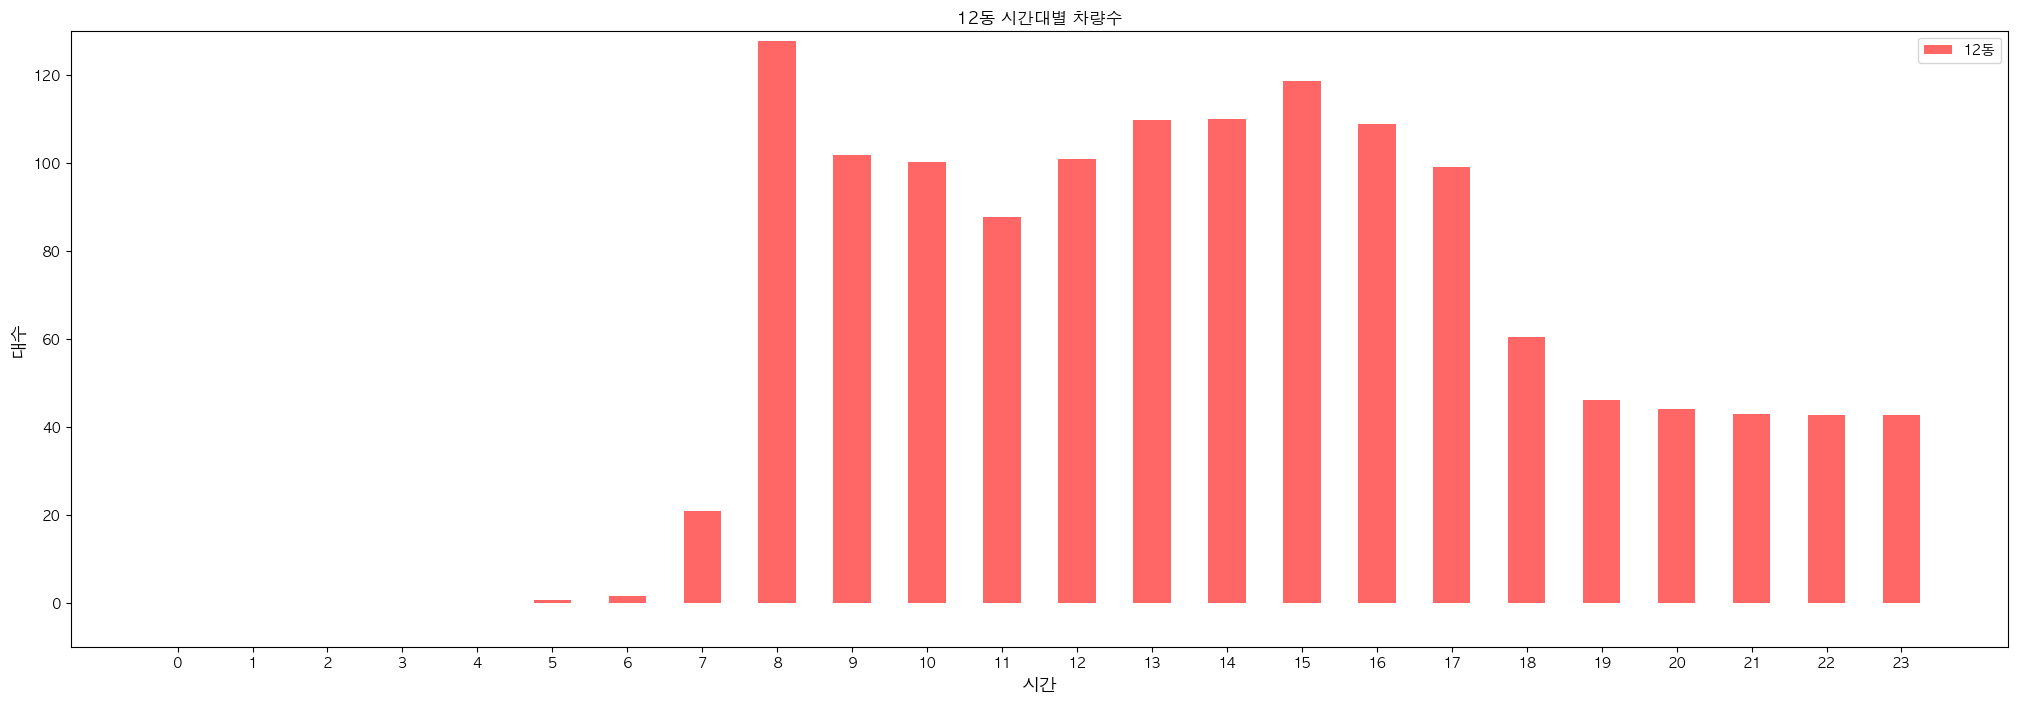

In [34]:
fig, ax = plt.subplots(figsize=(25,8))
bar_width = 0.5

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df[df['장소'] == '12동']['평균대수'], bar_width, alpha=0.6, color='red', label='12동')
# b2 = plt.bar(index+bar_width, data[data['장소'] == '13-1동']['대수'], bar_width, alpha=0.6, color='orange', label='13-1동')
#
# b3 = plt.bar(index+2*bar_width, data[data['장소'] == '13-2동']['대수'], bar_width, alpha=0.6, color='yellow', label='13-2동')
#
# b4 = plt.bar(index+3*bar_width, data[data['장소'] == '13-3동']['대수'], bar_width, alpha=0.6, color='green', label='13-3')
#
# b5 = plt.bar(index+4*bar_width, data[data['장소'] == '14-1동']['대수'], bar_width, alpha=0.6, color='blue', label='14-1동')
#
# b6 = plt.bar(index+5*bar_width, data[data['장소'] == '14-2동']['대수'], bar_width, alpha=0.6, color='purple', label='14-2동')
#
# b7 = plt.bar(index+6*bar_width, data[data['장소'] == '15동']['대수'], bar_width, alpha=0.6, color='magenta', label='15동')


plt.xticks(range(24), range(24))
plt.ylim(-10,130)
# x축, y축 이름 및 범례 설정
plt.xlabel('시간', size = 13)
plt.ylabel('대수', size = 13)
plt.legend()
plt.title('12동 시간대별 차량수')
plt.show()

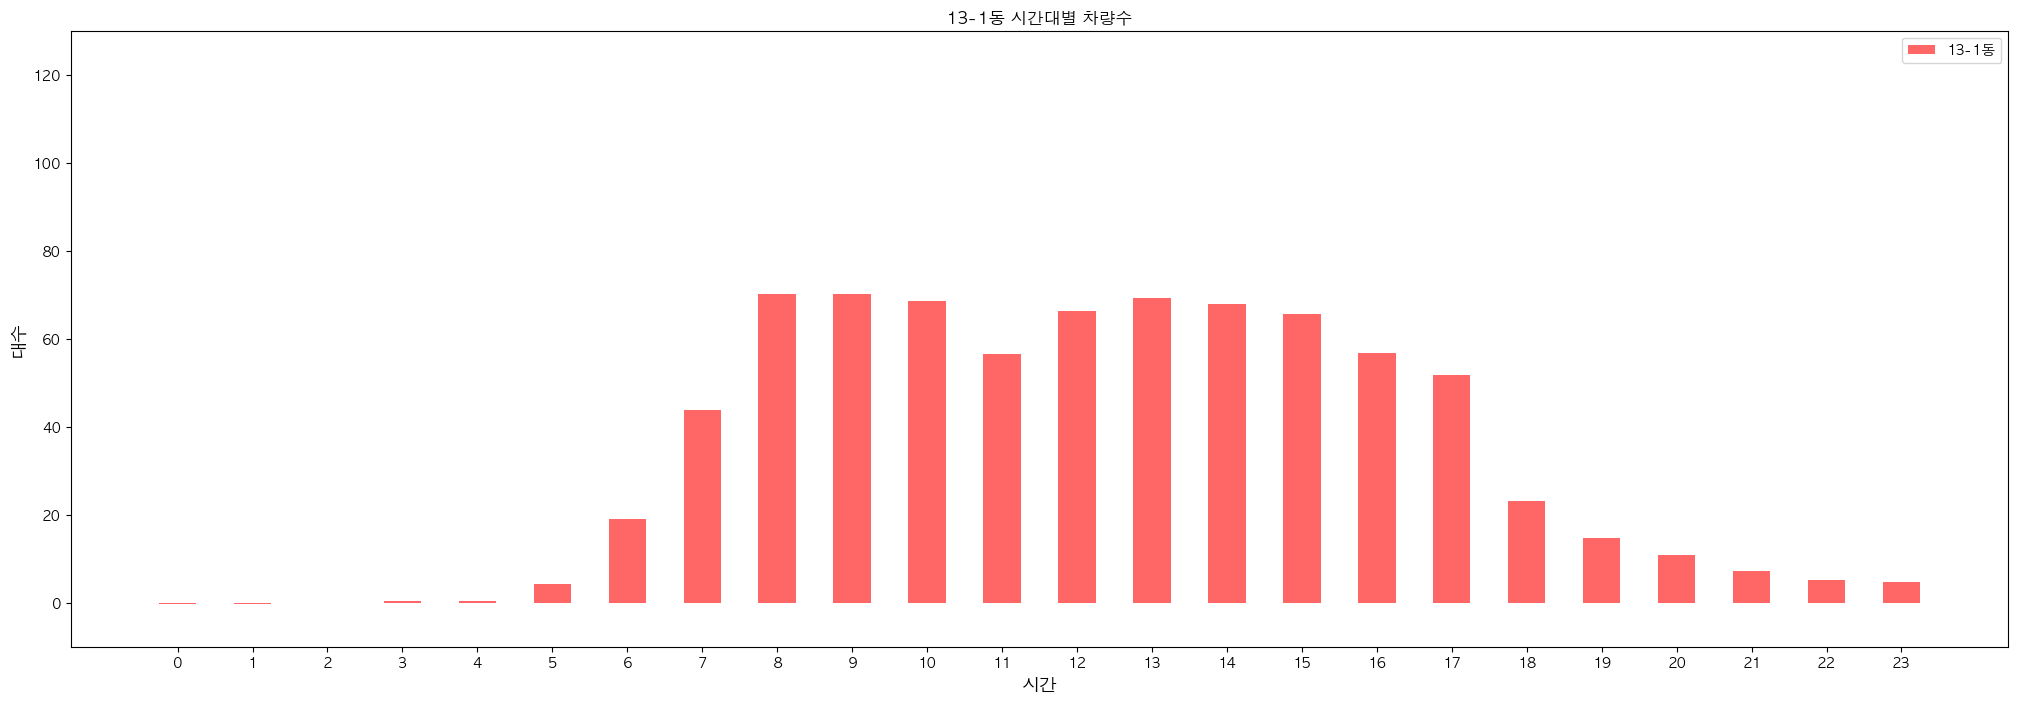

In [35]:
fig, ax = plt.subplots(figsize=(25,8))
bar_width = 0.5

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index,df[df['장소'] == '13-1동']['평균대수'], bar_width, alpha=0.6, color='red', label='13-1동')
plt.ylim(-10,130)

plt.xticks(range(24), range(24))
# x축, y축 이름 및 범례 설정
plt.xlabel('시간', size = 13)
plt.ylabel('대수', size = 13)
plt.legend()
plt.title('13-1동 시간대별 차량수')
plt.show()

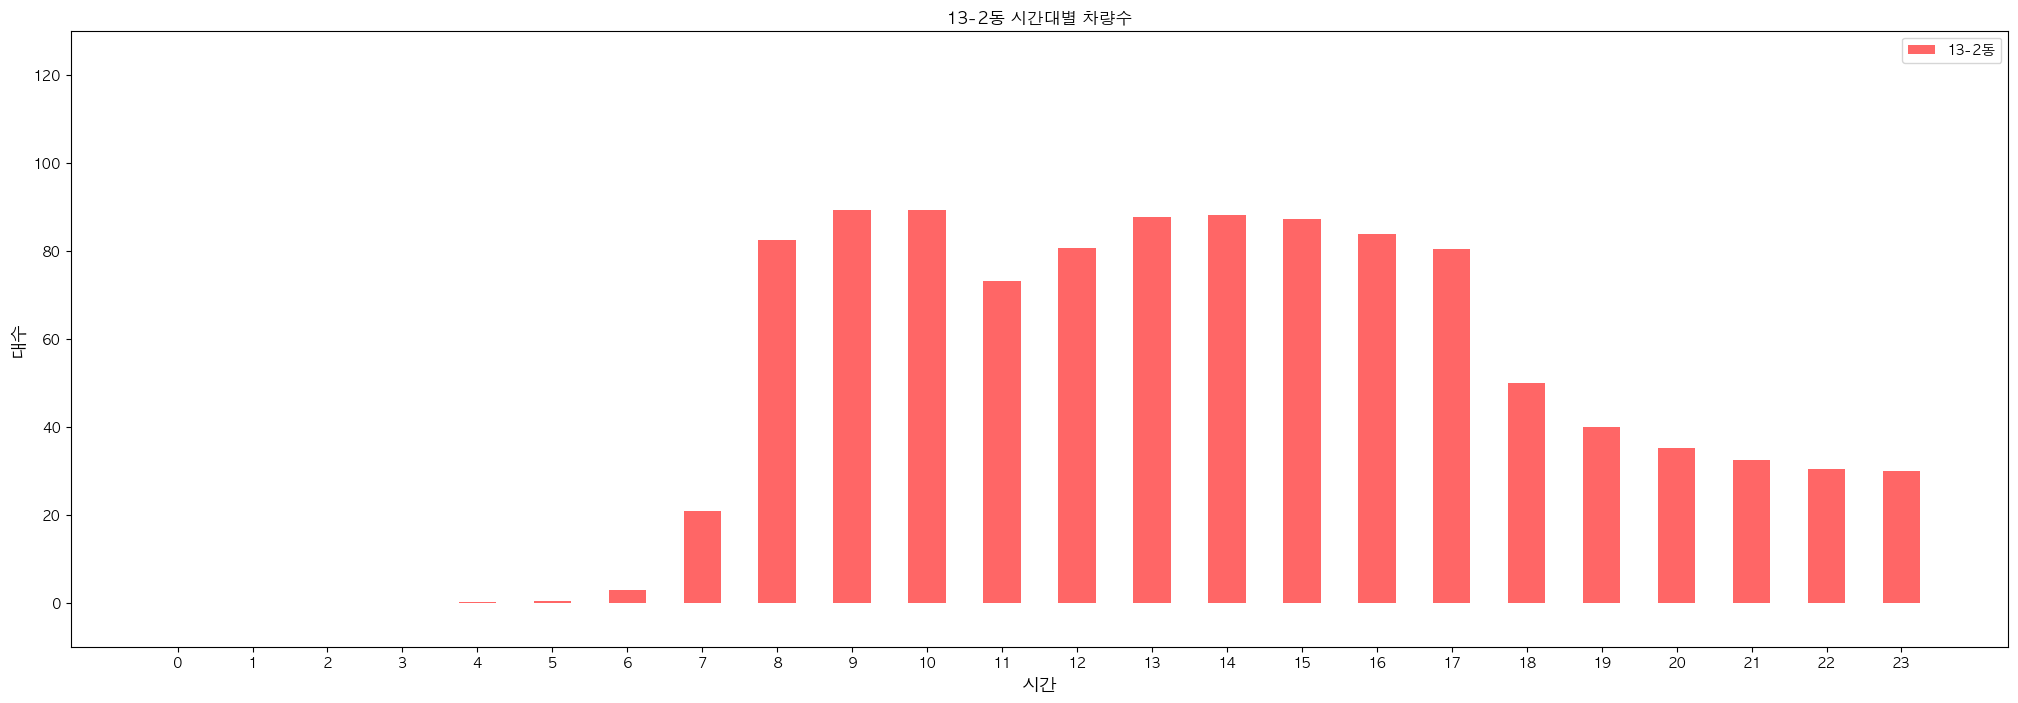

In [36]:
fig, ax = plt.subplots(figsize=(25,8))
bar_width = 0.5

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df[df['장소'] == '13-2동']['평균대수'], bar_width, alpha=0.6, color='red', label='13-2동')

plt.xticks(range(24), range(24))
plt.ylim(-10,130)
# x축, y축 이름 및 범례 설정
plt.xlabel('시간', size = 13)
plt.ylabel('대수', size = 13)
plt.legend()
plt.title('13-2동 시간대별 차량수')
plt.show()

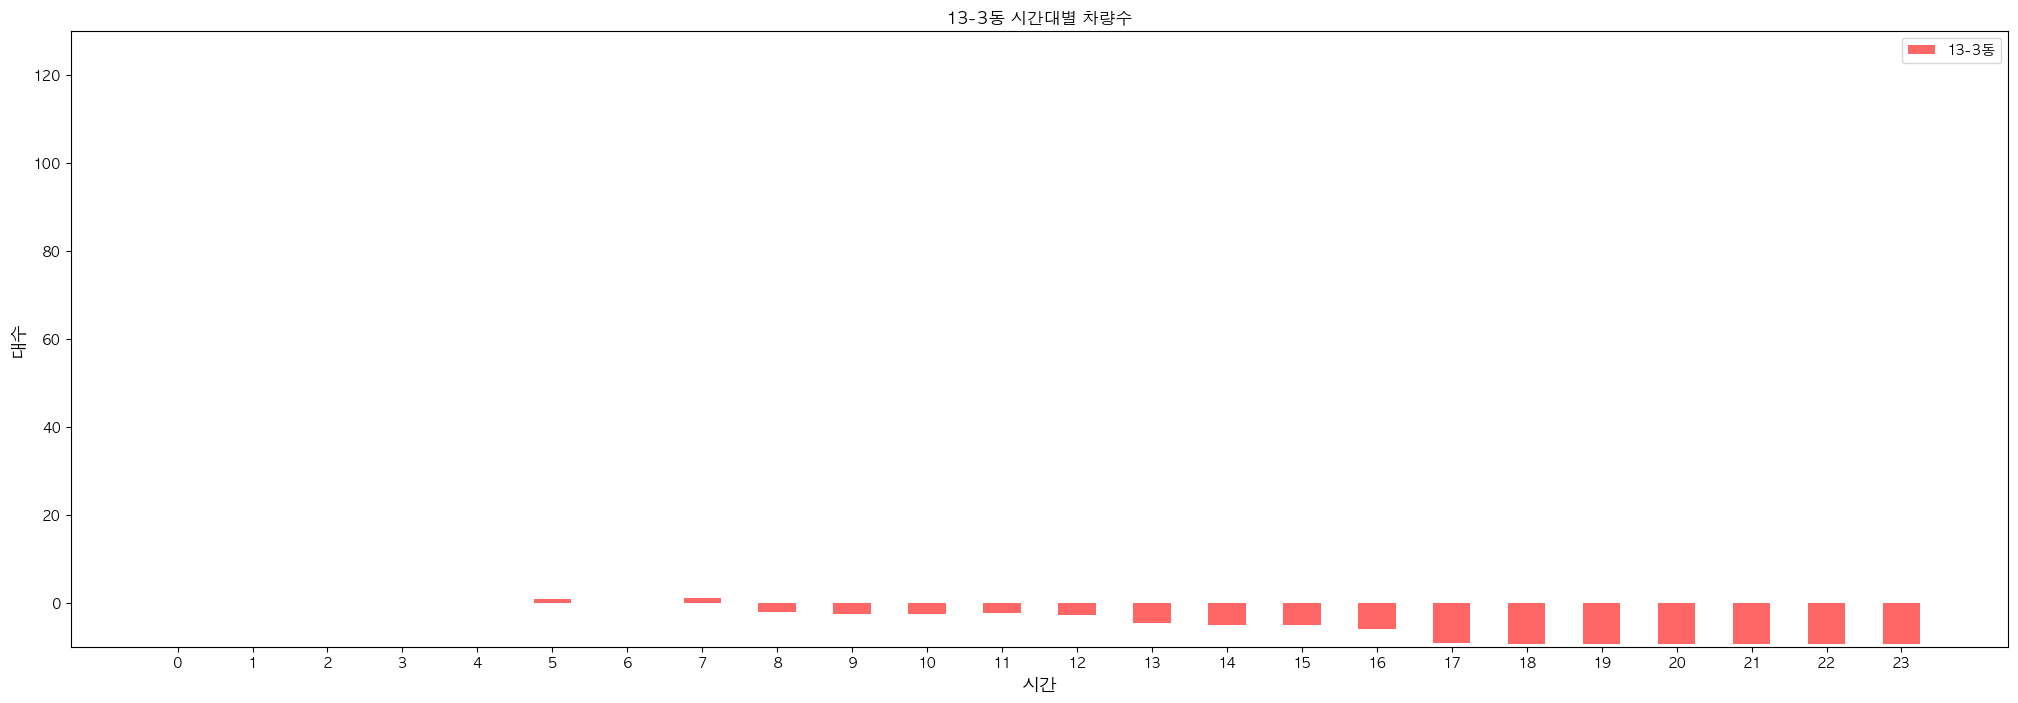

In [37]:
fig, ax = plt.subplots(figsize=(25,8))
bar_width = 0.5

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df[df['장소'] == '13-3동']['평균대수'], bar_width, alpha=0.6, color='red', label='13-3동')

plt.xticks(range(24), range(24))
plt.ylim(-10,130)
# x축, y축 이름 및 범례 설정
plt.xlabel('시간', size = 13)
plt.ylabel('대수', size = 13)
plt.legend()
plt.title('13-3동 시간대별 차량수')
plt.show()

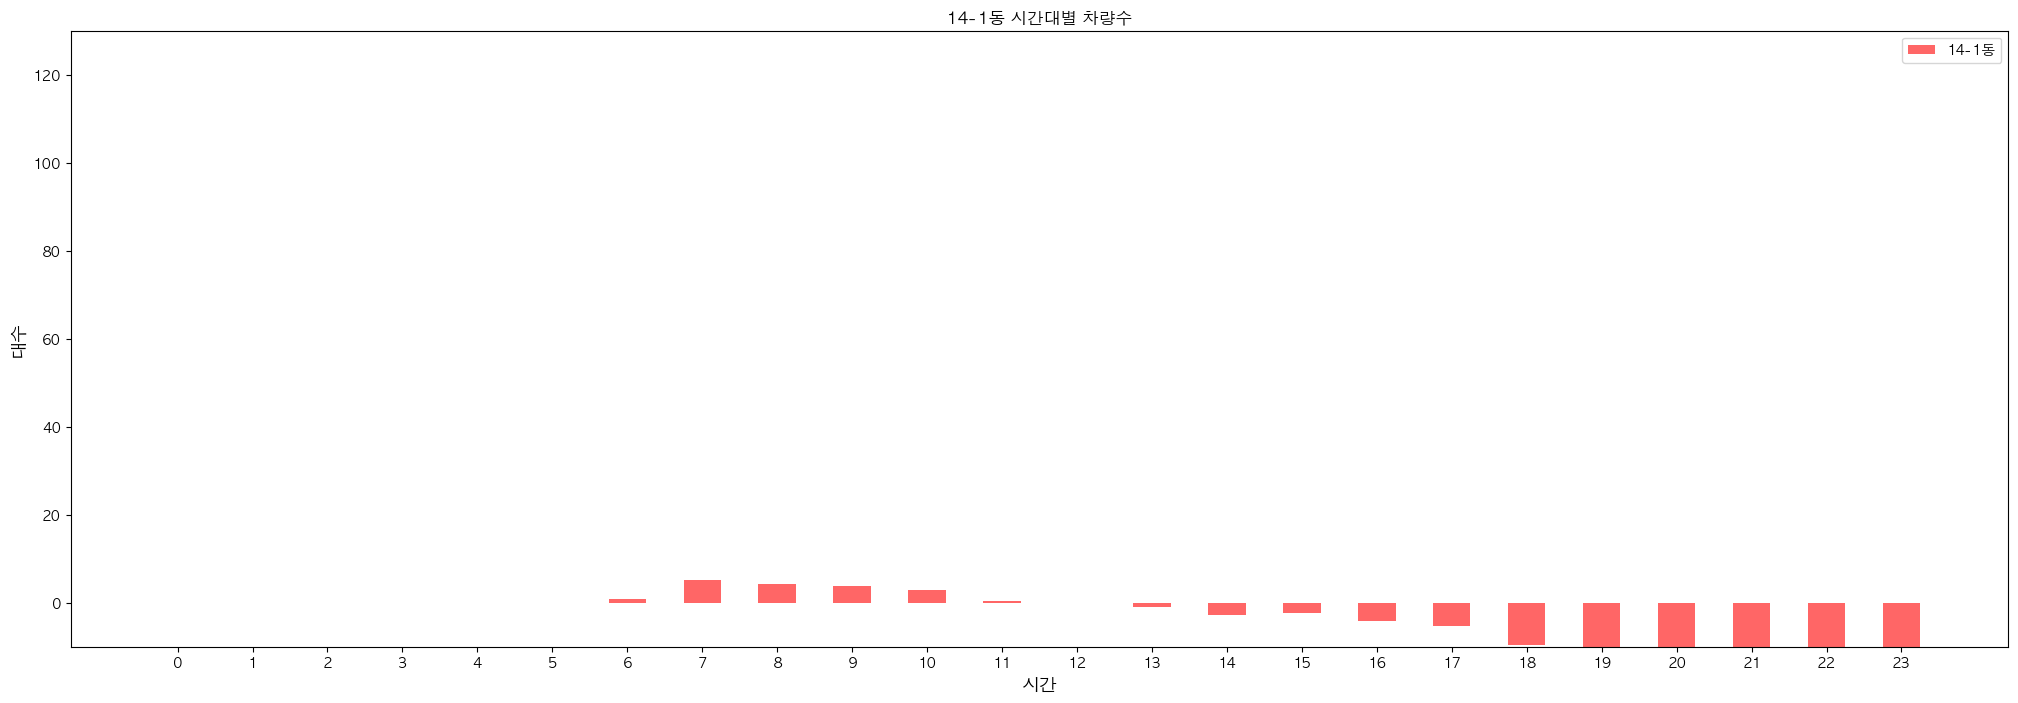

In [38]:
fig, ax = plt.subplots(figsize=(25,8))
bar_width = 0.5

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df[df['장소'] == '14-1동']['평균대수'], bar_width, alpha=0.6, color='red', label='14-1동')

plt.xticks(range(24), range(24))
plt.ylim(-10,130)
# x축, y축 이름 및 범례 설정
plt.xlabel('시간', size = 13)
plt.ylabel('대수', size = 13)
plt.legend()
plt.title('14-1동 시간대별 차량수')
plt.show()

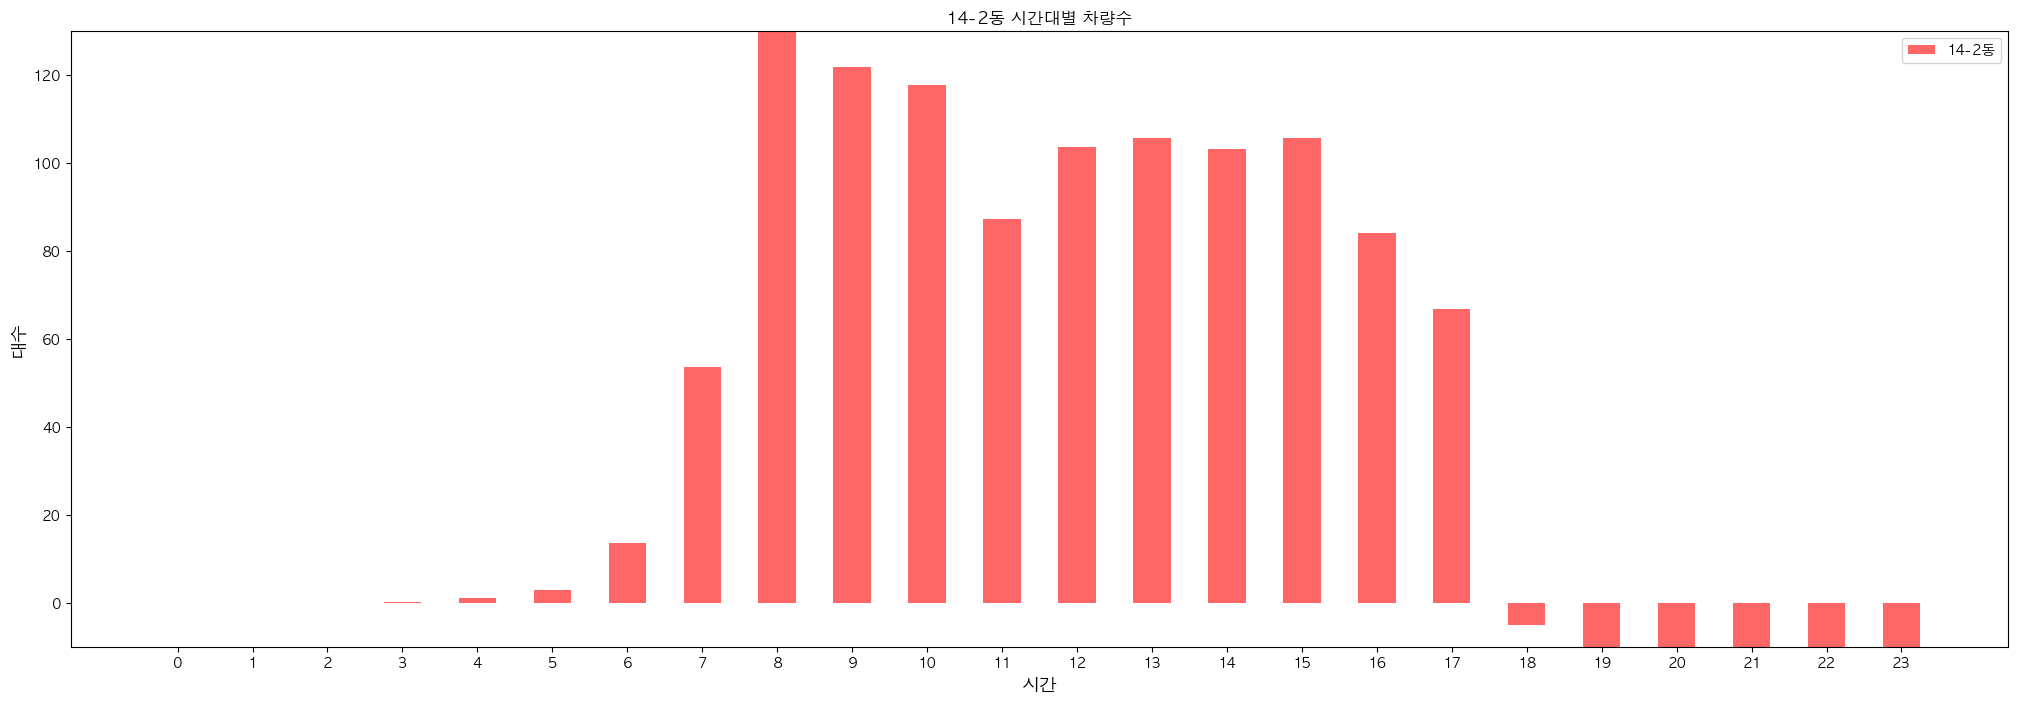

In [39]:
fig, ax = plt.subplots(figsize=(25,8))
bar_width = 0.5

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df[df['장소'] == '14-2동']['평균대수'], bar_width, alpha=0.6, color='red', label='14-2동')

plt.xticks(range(24), range(24))
plt.ylim(-10,130)
# x축, y축 이름 및 범례 설정
plt.xlabel('시간', size = 13)
plt.ylabel('대수', size = 13)
plt.legend()
plt.title('14-2동 시간대별 차량수')
plt.show()

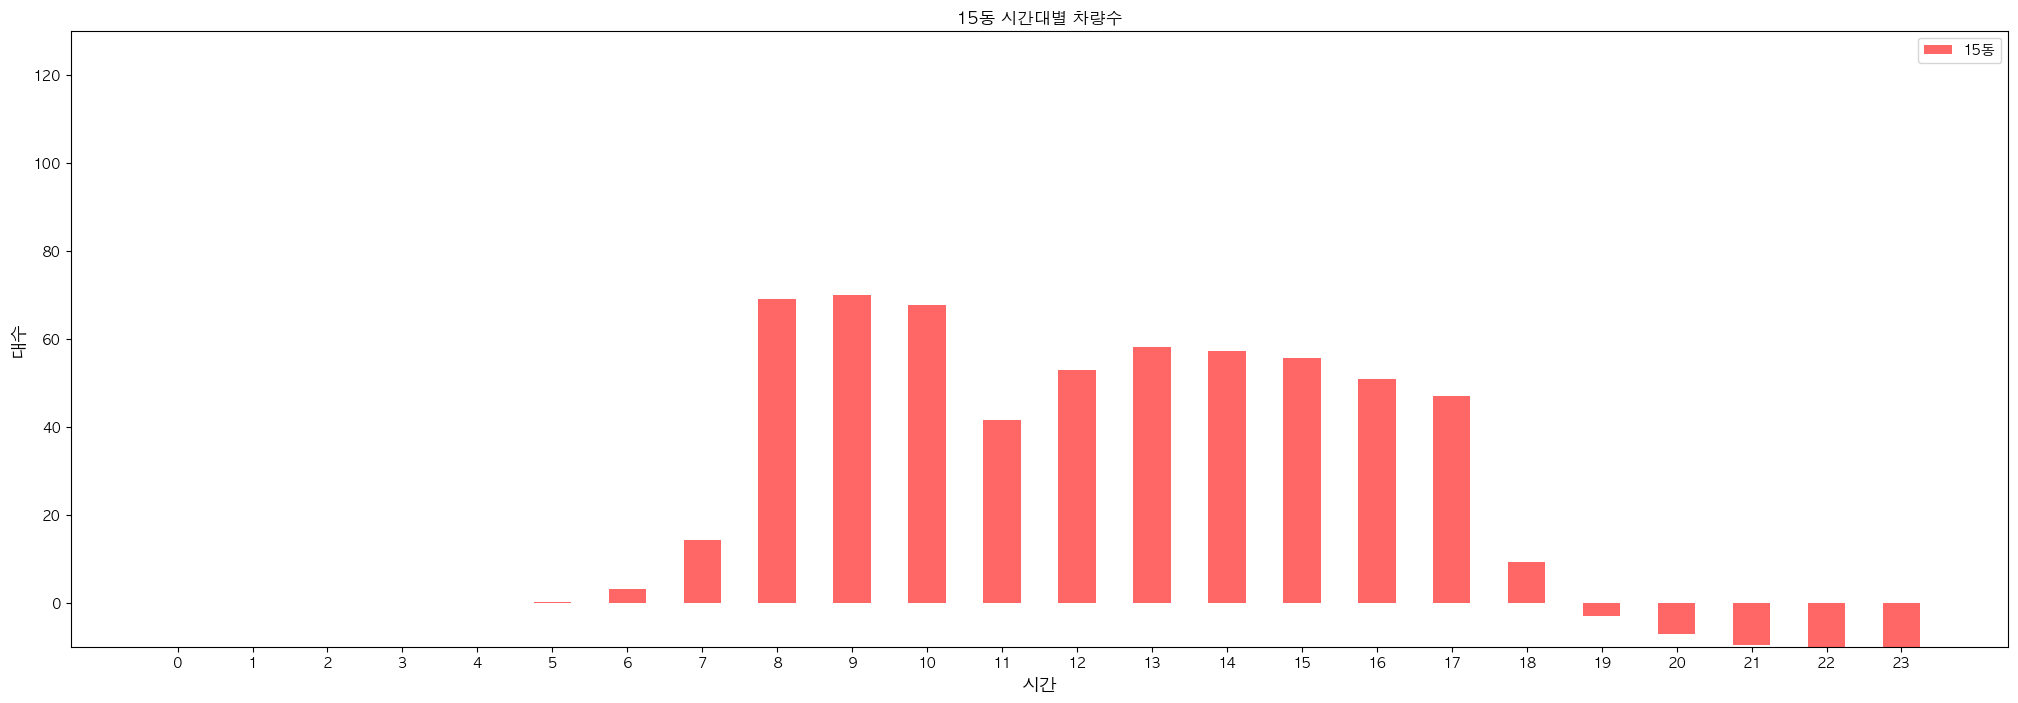

In [40]:
fig, ax = plt.subplots(figsize=(25,8))
bar_width = 0.5

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df[df['장소'] == '15동']['평균대수'], bar_width, alpha=0.6, color='red', label='15동')

plt.xticks(range(24), range(24))
plt.ylim(-10,130)
# x축, y축 이름 및 범례 설정
plt.xlabel('시간', size = 13)
plt.ylabel('대수', size = 13)
plt.legend()
plt.title('15동 시간대별 차량수')
plt.show()

## 차량 수가 -가 되는 이유?

In [41]:
arr = ['12동','13-1동','13-2동','13-3동','14-1동','14-2동','15동']
for i in arr :
    num = len(VW_in[VW_in['장비명2']== i]) - len(VW_out[VW_out['장비명2']== i])
    if num == 0 :
        print(f'{i}의 입차대수와 출차대수가 같습니다')
    elif num > 0:
        print(f'{i}의 입차대수가 출차대수보다 {num}만큼 많습니다.')
    else :
        print(f'{i}의 입차대수가 출차대수보다 {num}만큼 적습니다.')



12동의 입차대수가 출차대수보다 938만큼 많습니다.
13-1동의 입차대수가 출차대수보다 104만큼 많습니다.
13-2동의 입차대수가 출차대수보다 658만큼 많습니다.
13-3동의 입차대수가 출차대수보다 -207만큼 적습니다.
14-1동의 입차대수가 출차대수보다 -264만큼 적습니다.
14-2동의 입차대수가 출차대수보다 -1258만큼 적습니다.
15동의 입차대수가 출차대수보다 -233만큼 적습니다.


In [42]:
len(VW_in)

37916

In [43]:
len(VW_out)

38178